# Code

In [28]:
import keras
import pickle
from six.moves import cPickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras.layers import Dense
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
import cv2
import scipy
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [29]:
epochs = 20
# BASE_DIR = '../'
batchsize = 32

In [30]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(5, 5, 512)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.7))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

    return model

In [31]:
model = get_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 3, 3, 32)          147488    
_________________________________________________________________
activation_35 (Activation)   (None, 3, 3, 32)          0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                2112      
_________________________________________________________________
activation_36 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
__________

In [32]:
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []

    for image_filename in os.listdir(folder):
        img_file = cv2.imread(folder + '/' + image_filename)
        if img_file is not None:
            # Downsample the image to 120, 160, 3
            if not image_filename.startswith('NoGlauc'):
                label = 0
            else:
                label = 1
            img_file = scipy.misc.imresize(arr=img_file, size=(175, 175, 3))
            img_file = img_file/255
            img_arr = np.asarray(img_file)
            X.append(img_arr)
            y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y



In [33]:
X_train, y_train = get_data('Karims_data/Training/')
X_test, y_test = get_data('Karims_data/Testing/')

In [23]:
with open('featurized_train_imgs.pkl', 'rb') as f:
    featurized_training_data = pickle.load(f)
with open('featurized_test_imgs.pkl', 'rb') as f:
    featurized_test_data = pickle.load(f)

In [25]:
model = get_model()

# fits the model on batches
history = model.fit(
    featurized_training_data,
    y_train,
    validation_split=0.2,
    epochs=epochs,
    shuffle=True,
    batch_size=batchsize)


model.save_weights('binary_model.h5')
model.save('saved_model.h5')

Train on 2399 samples, validate on 600 samples
Epoch 1/20
2399/2399 [==============================] - 2s 948us/step - loss: 0.6772 - acc: 0.6098 - val_loss: 0.6428 - val_acc: 0.6817
Epoch 2/20
2399/2399 [==============================] - 1s 510us/step - loss: 0.6503 - acc: 0.6590 - val_loss: 0.6270 - val_acc: 0.6817
Epoch 3/20
2399/2399 [==============================] - 1s 599us/step - loss: 0.6532 - acc: 0.6628 - val_loss: 0.6307 - val_acc: 0.6817
Epoch 4/20
2399/2399 [==============================] - 1s 617us/step - loss: 0.6502 - acc: 0.6632 - val_loss: 0.6311 - val_acc: 0.6817
Epoch 5/20
2399/2399 [==============================] - 2s 684us/step - loss: 0.6558 - acc: 0.6632 - val_loss: 0.6418 - val_acc: 0.6817
Epoch 6/20
2399/2399 [==============================] - 1s 620us/step - loss: 0.6451 - acc: 0.6632 - val_loss: 0.6317 - val_acc: 0.6817
Epoch 7/20
2399/2399 [==============================] - ETA: 0s - loss: 0.6423 - acc: 0.662 - 1s 623us/step - loss: 0.6419 - acc: 0.6632 

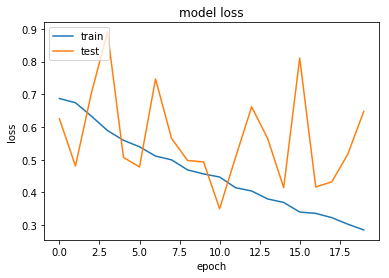

In [13]:
def plot_learning_curve(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.clf()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

plot_learning_curve(history)

# Accuracy

In [14]:
from sklearn.metrics import accuracy_score

print('Predicting on test data')
y_pred = np.rint(model.predict(X_test))

print(accuracy_score(y_test, y_pred))

Predicting on test data
0.878787878788


# Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[ 30  26]
 [ 14 260]]


# Images Misclassified

In [21]:
false_positives = np.intersect1d(np.where(y_pred == 1), np.where(y_test == 0))

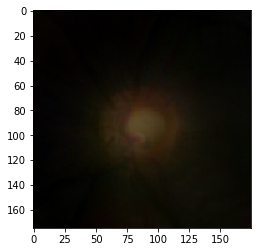

In [22]:
for i in range(len(false_positives)):
    img = X_test[false_positives[i]]
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Images Correctly Classified

In [23]:
true_positive = np.intersect1d(np.where(y_pred == 1), np.where(y_test == 1))


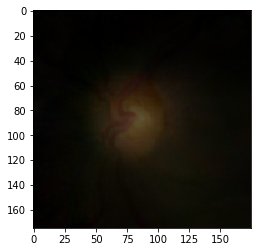

In [24]:
img = X_test[true_positive[0]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

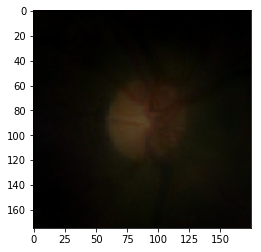

In [25]:
img = X_test[true_positive[5]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

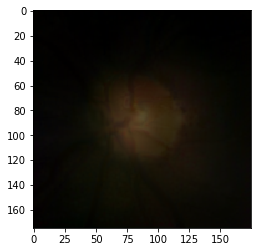

In [26]:
img = X_test[true_positive[8]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

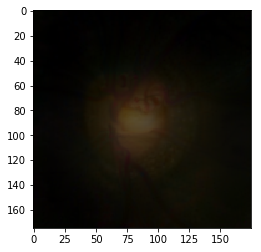

In [28]:
true_positive_not_glaucoma = np.intersect1d(np.where(y_pred == 0), np.where(y_test == 0))


# In[27]:

img = X_test[true_positive_not_glaucoma[0]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

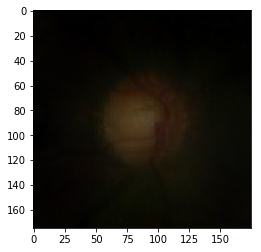

In [29]:
# In[29]:

img = X_test[true_positive_not_glaucoma[2]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

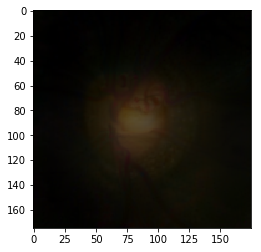

In [30]:
# # In[30]:

img = X_test[true_positive_not_glaucoma[3]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Testing Model on Lens Image

In [32]:
lens_X_test, lens_y_test = get_data('from_server/testing_lens/')

lens_y_test = encoder.transform(lens_y_test)


print('Predicting on lens data')
lens_y_pred = np.rint(model.predict(lens_X_test))

print(accuracy_score(lens_y_test, lens_y_pred))


from sklearn.metrics import confusion_matrix

print(confusion_matrix(lens_y_test, lens_y_pred))

Predicting on lens data
0.6
[[1 0]
 [6 8]]


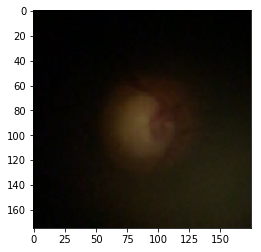

In [55]:
true_negative = np.intersect1d(np.where(lens_y_pred == 0), np.where(lens_y_test == 0))

img = lens_X_test[true_negative[0]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))